# Redes Neuronales 2021
## Práctico 2

Alumno: Juan Manuel López
Identificación: 39.764.711

In [1]:
#imports and fundamentals
import numpy as np
import matplotlib.pyplot as plt

def rk4(f,x,t,dt,p):
    """
    p[0] - a
    p[1] - b
    p[2] - c
    p[3] - d
    p[4] - I(t)
    """
    k1 = f(x,t,p)
    k2 = f(x+0.5*dt*k1,t+0.5*dt,p)
    k3 = f(x+0.5*dt*k2,t+0.5*dt,p)
    k4 = f(x+dt*k3,t+dt,p)
    return x+dt*(k1+2.0*k2+2.0*k3+k4)/6.0

def integrador_ode(met, f, x0, t0, tf, tn, p, condition):
    """
    p[0] - a
    p[1] - b
    p[2] - c
    p[3] - d
    p[4] - I(t)
    """
    t = np.linspace(t0, tf, tn)
    dt = t[1] - t[0]
    
    if type(x0) == list:
        xn = len(x0)
    elif type(x0) == np.ndarray:
        xn = x0.shape[0]
    else:
        raise ValueError("Invalid type of x0")
    
    x = np.zeros((xn, tn))
    x[:, 0] = np.array([x0_val for x0_val in x0])
    
    #print(t) #checked
    #print(x) #checked
    
    for tindex in range(1, tn):
        #print(t[tindex-1]) #checked
        #print(x[:, tindex-1]) #chekced
        
        #print(met(f, x[:, tindex-1], t[tindex-1], dt, p))
        x[:, tindex] = met(f, x[:, tindex-1], t[tindex-1], dt, p)
        x[:, tindex] = condition(x[:, tindex], p)
        #print(x[:, tindex])

    return t, x

In [2]:
#functions
def v(x, t, p):
    """
    p[0] - a
    p[1] - b
    p[2] - c
    p[3] - d
    p[4] - I(t)
    """
    #print("v: ", 0.04*x[0]**2 + 5*x[0] + 140 - x[1] + p[4](t))
    return 0.04*x[0]**2 + 5*x[0] + 140 - x[1] + p[4](t)

def u(x, t, p):
    """
    p[0] - a
    p[1] - b
    p[2] - c
    p[3] - d
    p[4] - I(t)
    """
    #print("u: ", p[0]*(p[1]*x[0] - x[1]))
    return p[0]*(p[1]*x[0] - x[1])

def u_v(x, t, p):
    return np.array([v(x, t, p), u(x, t, p)])

In [3]:
#condition
def condition(x, p):
    """
    p[0] - a
    p[1] - b
    p[2] - c
    p[3] - d
    p[4] - I(t)
    """
    if x[0] >= 30:
        return np.array([p[2], x[1] + p[3]])
    else:
        return x

In [4]:
#input
def I1(t, thr, out):
    if t>thr:
        return out
    return 0
    
def I2(t, thr, out):
    if t>thr:
        return 0
    return out

def I3(t, thr, out):
    for th, o in zip(thr[::-1], out[::-1]):
        if t>th:
            return o
    return 0
    
def calc_and_plot(a, b, c, d, I, title = "", save=False, v0 = None, u0 = None):
    
    if v0 is None:
        v0 = c
    if u0 is None:
        u0 = d
    t_array, x_array = integrador_ode(met = rk4, 
                                      f = u_v, 
                                      x0 = [v0, u0], 
                                      t0 = 0, tf = 500, tn = 5001, 
                                      p = [a,
                                           b,
                                           c,
                                           d,
                                           I
                                          ],
                                      condition = condition
                                     )

    fig, axs = plt.subplots(nrows=3, ncols=1, sharex = True, gridspec_kw={'height_ratios': [3, 1, 3]})
    fig.set_figwidth(5)
    fig.set_figheight(10)
    fig.suptitle(title)
    axs[0].plot(t_array, x_array[0])
    axs[0].set_title("v Function")
    axs[0].set_ylabel("Voltage[uv]")
    axs[2].plot(t_array, x_array[1])
    axs[2].set_title("u Function")
    axs[2].set_xlabel("Time[ms]")
    axs[2].set_ylabel("Voltage[uv]")
    axs[1].plot(t_array, np.array([I(t) for t in t_array]))
    axs[1].set_title("Input")
    axs[1].set_ylabel("Current[nA]")
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
    if save:
        fig.savefig(title+".png")

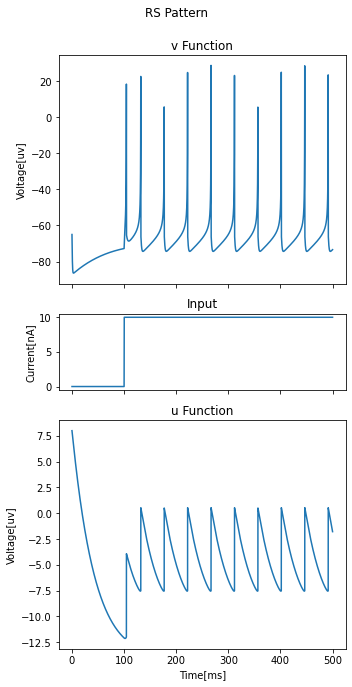

In [5]:
calc_and_plot(0.02, 0.2, -65, 8, lambda t: I1(t, 100, 10), "RS Pattern", True)

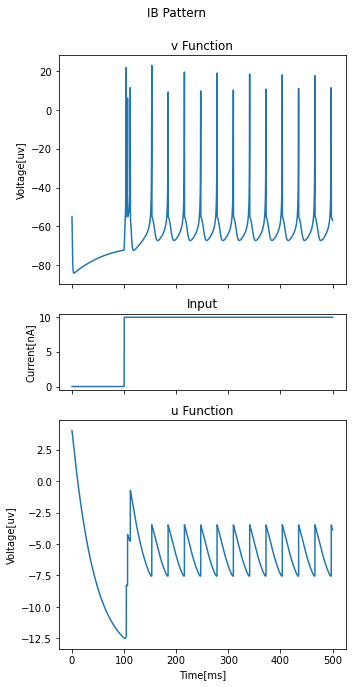

In [6]:
calc_and_plot(0.02, 0.2, -55, 4, lambda t: I1(t, 100, 10), "IB Pattern", True)

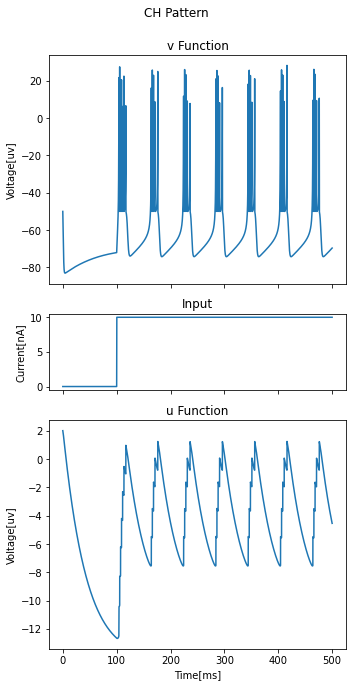

In [7]:
calc_and_plot(0.02, 0.2, -50, 2, lambda t: I1(t, 100, 10), "CH Pattern", True)

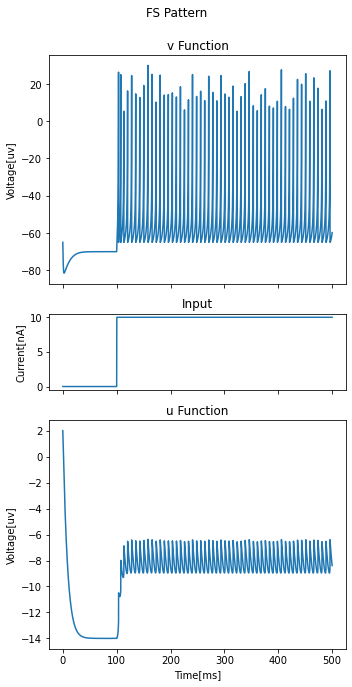

In [8]:
calc_and_plot(0.1, 0.2, -65, 2, lambda t: I1(t, 100, 10), "FS Pattern", True)

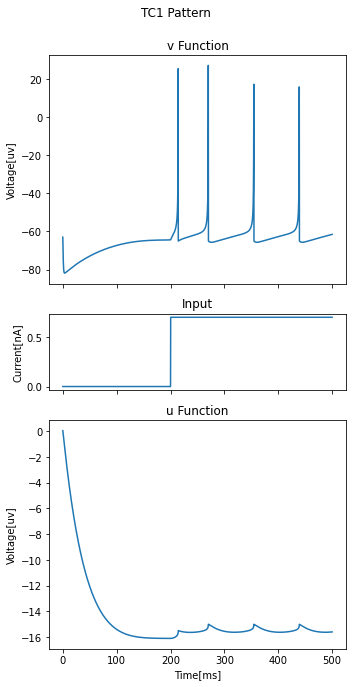

In [9]:
calc_and_plot(0.02, 0.25, -65, 0.05, lambda t: I1(t, 200, 0.7), "TC1 Pattern", True, v0 = -63) #probar aca como mientras mas subo la corriente de input mas picos aparecen en la seguidilla
#el valor que mas me gusto es 0.7 a los 200 ms

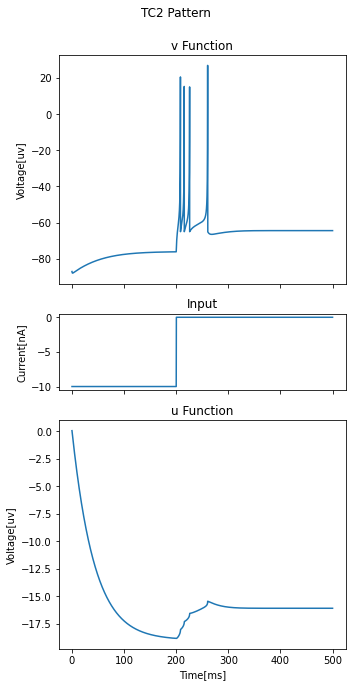

In [10]:
calc_and_plot(0.02, 0.25, -65, 0.05, lambda t: I2(t, 200, -10), "TC2 Pattern", True, v0 = -87) #probar aca como mientras mas negativa es la corriente inicial más picos aparecen y más se condensan en el bursting 
#el valor que más me gusto es -10 a los 200 ms

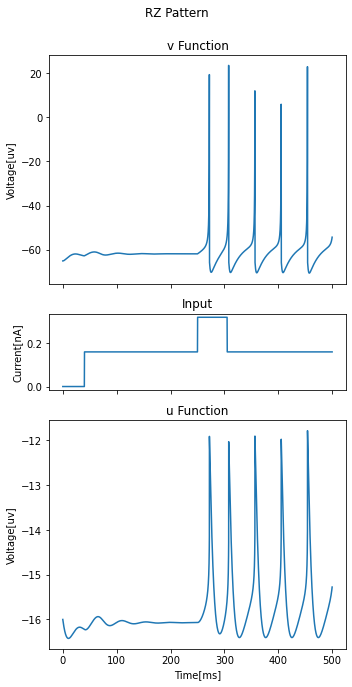

In [11]:
calc_and_plot(0.1, 0.26, -65, 2, lambda t: I3(t, [40, 250, 305], [0.16, 0.32, 0.16]), "RZ Pattern", True, u0 = -16)
#por mas que resuene en ~-63, si lo inicializo ahi, baja hasta el 80 y algo y vuelve hasta el punto de resonancia
#me di cuenta que esto pasaba por la funcion u que tiene una bajada hasta ~-16 y medio como que se plancha ahi hasta recibir el input,
#si a u la inicializo en ese valor, no desciende y no hace descender (no se por que) a v. Esto seguramente se puede aprovechar en todas las otras instancias

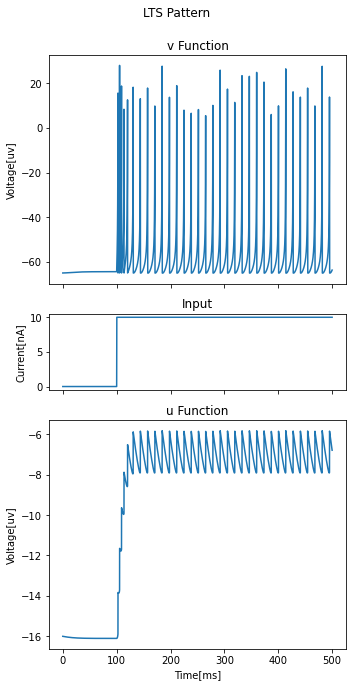

In [12]:
calc_and_plot(0.02, 0.25, -65, 2, lambda t: I1(t, 100, 10), "LTS Pattern", True, u0 = -16)